In [6]:
import numpy as np
import pandas as pd
import scipy as sc
import scipy.stats as st
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import f
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [7]:
# Load data from CSV file
file2 = pd.read_csv("/Users/benfunk/DataspellProjects/MethaneDataScience/Output/With low Data .csv")

# Extract the columns from the data
#file2=file2[file2['Target PPM']<=100]
xDataResistance = file2.loc[:, 'Resistance']
xDataRatio = file2.loc[:, 'Ratio']
xDataRH = file2.loc[:, 'RelativeHumidity']
xDataTemp = file2.loc[:, 'Temperature']
yDataTargetPPM = file2.loc[:, 'Target PPM']

# Separate the independent and dependent variables
X = file2.drop('Target PPM', axis='columns')
y = file2.loc[:, 'Target PPM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#
def funct(X, a, b, c,d):
    R, H = X
    return a*R**b+c*H*(a*R**b+c)+d
p0 = 1,1,.5,1
# Perform curve fitting using the funct function, xDataResistance, and yDataTargetPPM data
# Set the maximum number of function evaluations to 1000000
popt, pcov = sc.optimize.curve_fit(funct, (xDataResistance,xDataRH), yDataTargetPPM, maxfev=1000000)

# Print the optimized parameters
print(popt)

# Extract the Resistance column from the X_test dataframe
R_test = X_test.loc[:, 'Resistance']
H_test = X_test.loc[:, 'RelativeHumidity']
T_test = X_test.loc[:, 'Temperature']

# Generate the predictions using the optimized parameters and the input data
y_pred = funct((R_test,H_test), *popt)

# Calculate the mean squared error
testVal = mean_squared_error(y_test, y_pred, squared=False)
print(testVal)

# Iterate through target PPM values and calculate the 95% confidence interval for each value
for i in range(0, 1001, 200):
    # Filter the data for the current target PPM value
    df = file2[file2['Target PPM'] == i]

    # Calculate the model output using the filtered data and optimized parameters
    myData = funct((df.loc[:, 'Resistance'],df.loc[:, 'RelativeHumidity']), *popt)

    # Calculate the 95% confidence interval using the t-distribution
    low95, high95 = st.t.interval(alpha=0.95, df=len(myData), loc=np.mean(myData), scale=st.sem(myData))

    # Print the 95% confidence interval for the current target PPM value
    print("The 95% Confidence Interval for " + str(i) + " is (" + str(low95) + ", " + str(high95) + ")")

[-3.12426395e+02  1.22793973e-04  3.12470529e+02  6.59699146e+02]
179.92193687518326
The 95% Confidence Interval for 0 is (-92.5226860043754, -42.62217336232081)
The 95% Confidence Interval for 200 is (323.57795575002865, 336.9290709415093)
The 95% Confidence Interval for 400 is (438.1123280022356, 461.4846905381439)
The 95% Confidence Interval for 600 is (501.593945846189, 546.483850869565)
The 95% Confidence Interval for 800 is (553.6762432888803, 607.6454770672732)
The 95% Confidence Interval for 1000 is (597.1790676380996, 654.5424491923078)


/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_7875/761841336.py:34: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  low95, high95 = st.t.interval(alpha=0.95, df=len(myData), loc=np.mean(myData), scale=st.sem(myData))


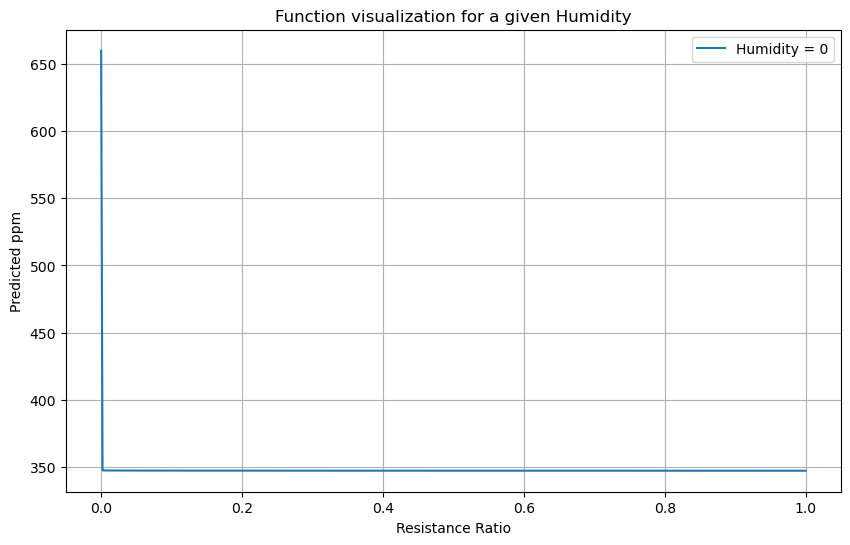

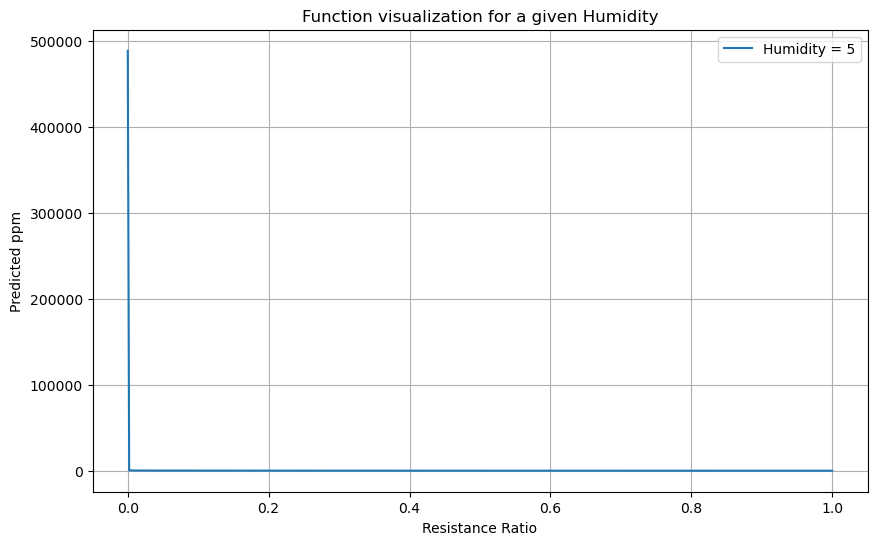

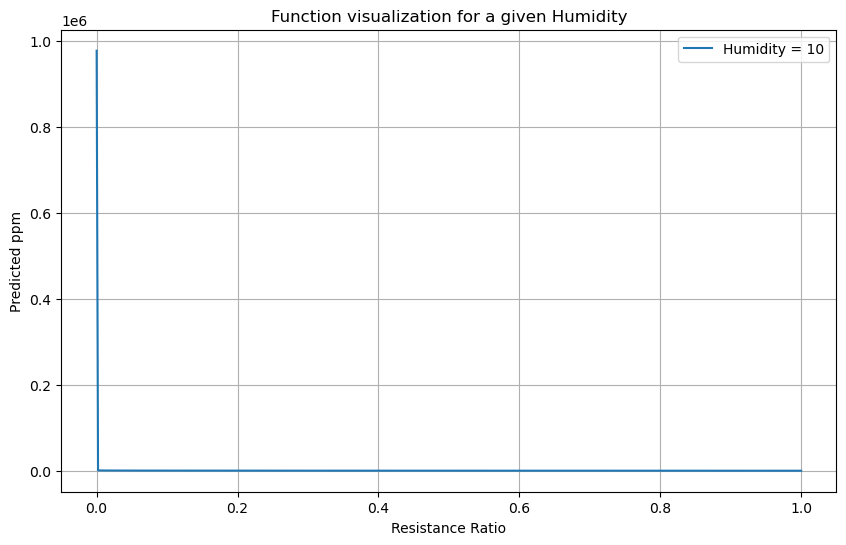

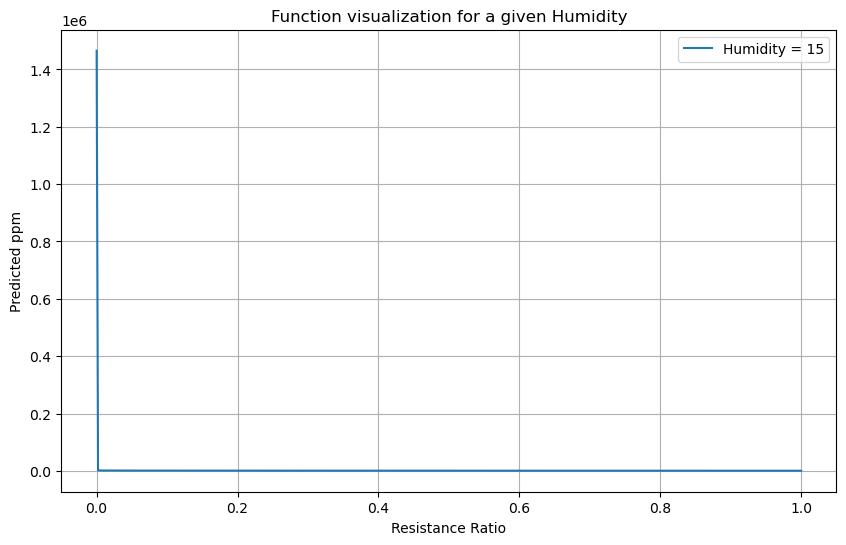

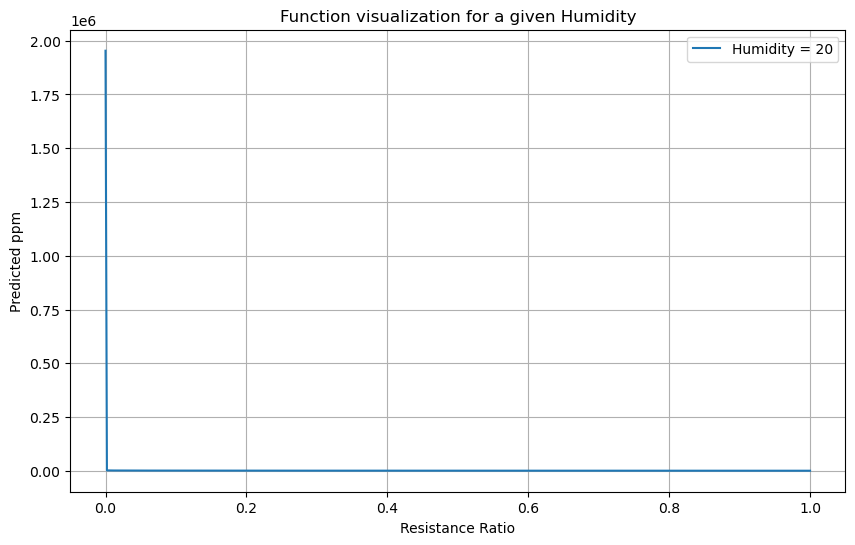

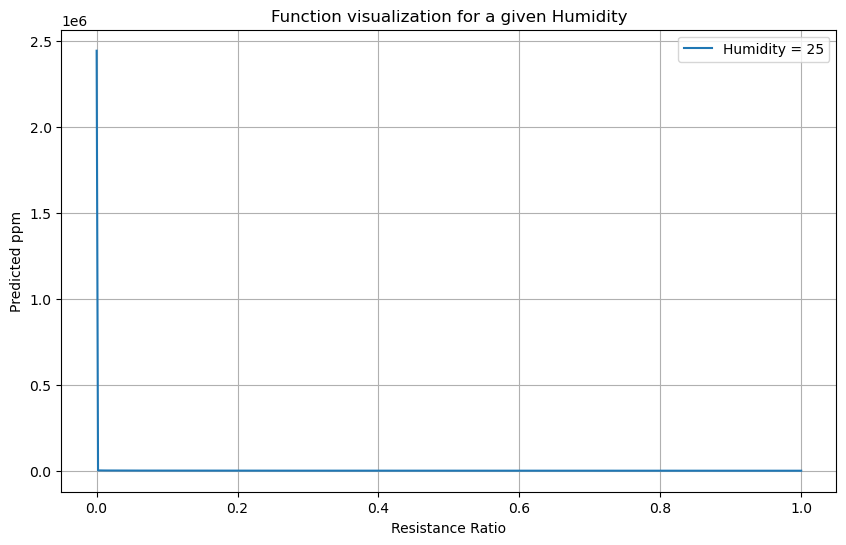

In [9]:
H = 5  # given humidity value

# R values
R = np.linspace(0, 1, num=500)
for H in [0,5,10,15,20,25]:
    # calculate function values
    y_values = [funct((r, H),*popt) for r in R]

    # plotting
    plt.figure(figsize=(10,6))
    plt.plot(R, y_values, label=f'Humidity = {H}')
    plt.xlabel('Resistance Ratio')
    plt.ylabel('Predicted ppm')
    plt.title('Function visualization for a given Humidity')
    plt.legend()
    plt.grid(True)
    plt.show()